<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_12_KNN_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
glass = pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
glass.shape

(214, 10)

In [7]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(glass,test_size=0.2)

In [11]:
X=glass.iloc[:,0:9]
y=glass['Type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [14]:
scale_X_train= scaler.fit_transform(X_train)
scale_X_test= scaler.transform(X_test)

In [15]:
num_folds = 10
kfold = KFold(n_splits=10)

In [20]:
model = KNeighborsClassifier(n_neighbors= 10)
results = cross_val_score(model, scale_X_train, y_train, cv=kfold)

In [21]:
print(results.mean())

0.5852380952380952


### Grid Search for Algorithm Tuning

In [22]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [24]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid.fit(scale_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.6924137931034482
{'n_neighbors': 1}


### Visualizing the CV results

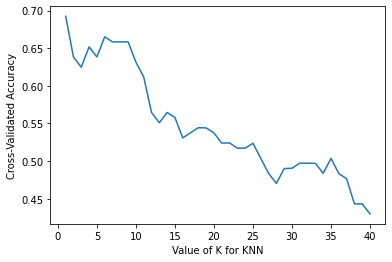

In [26]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scale_X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [27]:
#from the plot we can see that after K=1 the CV accuracy is declining gradually,so will train our model with K=1
model3= KNeighborsClassifier(n_neighbors=1)
model3.fit(scale_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred= model3.predict(scale_X_test)
y_pred

array([7, 1, 1, 6, 5, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 7, 1, 1, 3, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 1, 7, 2, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 7, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [29]:
accuracy_score(y_test,y_pred)

0.7538461538461538